# Usage Guide : pygtm
## search elements

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
sys.path.insert(0, "../")
from pygtm.physical import physical_space


# Parameters
- T: Transition time [day]
- spatial_dis : number of bin in the the meridional direction (the number in the zonal direction is fixed to have almost square bin)
- lon : min and max longitude value of the initial domain
- lat : min and max latitude value of the initial domain

In [3]:
T = 5  # transition time [days]
spatial_dis = 75
lon = [-98, 35]
lat = [-10, 80]

# create the grid and bins
d = physical_space(lon, lat, spatial_dis)

# Searching the element number of a specific location

In [4]:
p = [-60, 20]  # lon, lat
el_id = d.find_element(p[0], p[1])
print(el_id)

[1205]


(-60.4, -58.3)

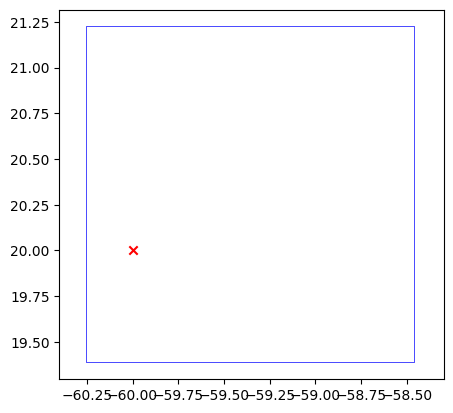

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect="equal")

# plot the element and the search location
d.bins_contour(ax, bin_id=[el_id[0]], edgecolor="b")

# search location
ax.scatter(p[0], p[1], marker="x", color="r")

ax.set_xlim([-60.4, -58.3])

# The function is also vectorize so it's possible to search multiple points

In [6]:
x_p = np.array([-70, -60, -40, 0, 10, 30])
y_p = np.array([70, 20, 30, 0, 74, 30])
els_id = d.find_element(x_p, y_p)
print(repr(els_id))

array([3197, 1205, 1586,  424, 3390, 1625])


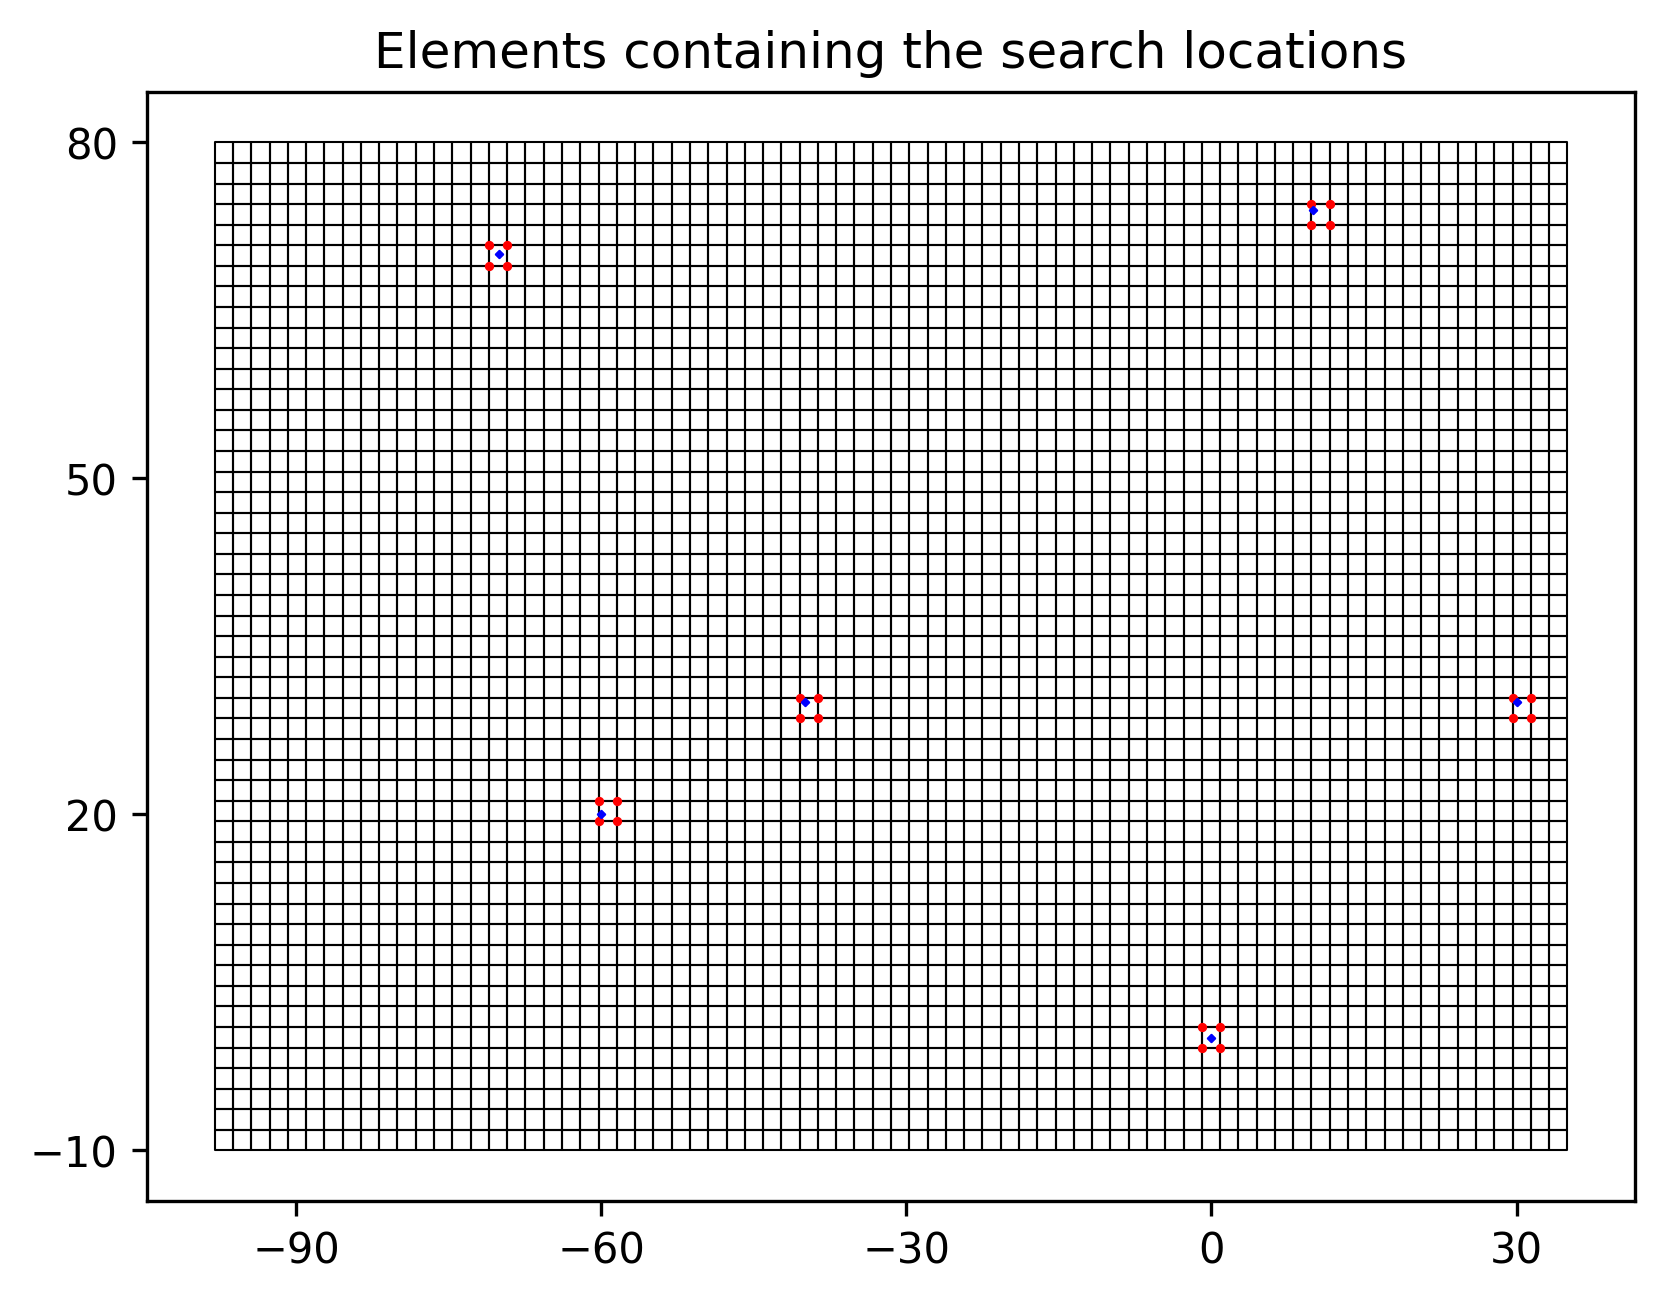

In [7]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)

d.bins_contour(ax)

# scatter at the corner of the element containing the point
for i, el_id in enumerate(els_id):
    el_c = d.coords[d.bins[el_id, :], :]
    ax.scatter(el_c[:, 0], el_c[:, 1], s=1.5, marker="o", color="r")
    ax.scatter(x_p[i], y_p[i], s=1.5, marker="x", color="b")

ax.set_xticks([-90, -60, -30, 0, 30])
ax.set_yticks([-10, 20, 50, 80])
ax.set_title("Elements containing the search locations");